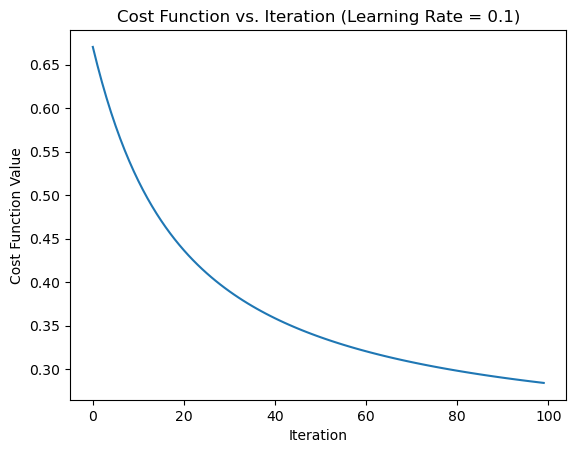

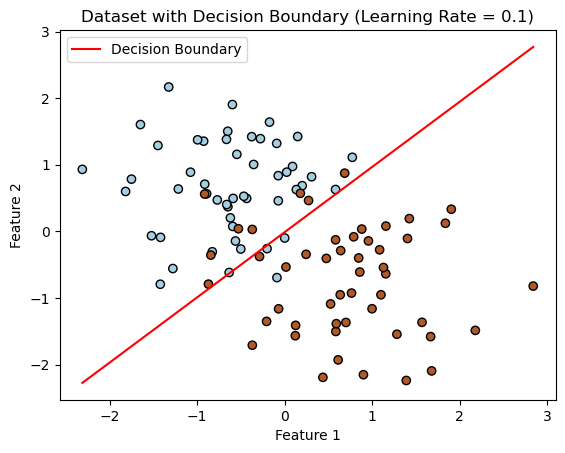

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X = np.genfromtxt('logisticX.csv', delimiter=',')
y = np.genfromtxt('logisticY.csv', delimiter=',')

# Standardize the independent variable
X = (X - X.mean()) / X.std()

# Add a bias term to the input features
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -1 / m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient
        costs.append(cost_function(X, y, theta))

    return theta, costs

# Initialize parameters
theta_initial = np.zeros(X.shape[1])

# Set learning rate and number of iterations
learning_rate = 0.1
iterations = 100

# Train the model
theta_final_0_1, costs_0_1 = gradient_descent(X, y, theta_initial, learning_rate, iterations)

# Plot cost function vs. iteration
plt.plot(costs_0_1)
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration (Learning Rate = 0.1)')
plt.show()

# Plot decision boundary
x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_values = -(theta_final_0_1[1] * x_values + theta_final_0_1[0]) / theta_final_0_1[2]

plt.plot(x_values, y_values, label='Decision Boundary', color='red')
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary (Learning Rate = 0.1)')
plt.legend()
plt.show()



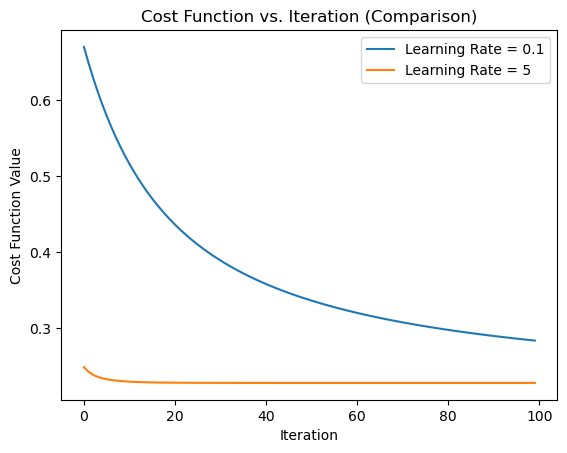

In [4]:
# Initialize parameters
theta_initial = np.zeros(X.shape[1])

# Set learning rate and number of iterations
learning_rate_5 = 5

# Train the model with learning rate 5
theta_final_5, costs_5 = gradient_descent(X, y, theta_initial, learning_rate_5, iterations)

# Plot cost function vs. iteration for both learning rates
plt.plot(costs_0_1, label='Learning Rate = 0.1')
plt.plot(costs_5, label='Learning Rate = 5')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration (Comparison)')
plt.legend()
plt.show()


In [6]:
# Predict using the final model with learning rate 0.1
y_pred_0_1 = (sigmoid(X.dot(theta_final_0_1)) >= 0.5).astype(int)

# Predict using the final model with learning rate 5
y_pred_5 = (sigmoid(X.dot(theta_final_5)) >= 0.5).astype(int)

# Confusion matrix
conf_matrix_0_1 = np.array([[np.sum((y == 1) & (y_pred_0_1 == 1)), np.sum((y == 0) & (y_pred_0_1 == 1))],
                            [np.sum((y == 1) & (y_pred_0_1 == 0)), np.sum((y == 0) & (y_pred_0_1 == 0))]])

conf_matrix_5 = np.array([[np.sum((y == 1) & (y_pred_5 == 1)), np.sum((y == 0) & (y_pred_5 == 1))],
                          [np.sum((y == 1) & (y_pred_5 == 0)), np.sum((y == 0) & (y_pred_5 == 0))]])

# Calculate accuracy, precision, recall, F1-score
def calculate_metrics(conf_matrix):
    tp, fp, fn, tn = conf_matrix.flatten()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score

accuracy_0_1, precision_0_1, recall_0_1, f1_score_0_1 = calculate_metrics(conf_matrix_0_1)
accuracy_5, precision_5, recall_5, f1_score_5 = calculate_metrics(conf_matrix_5)

print("Confusion Matrix for Learning Rate 0.1:")
print(conf_matrix_0_1)

print("\nConfusion Matrix for Learning Rate 5:")
print(conf_matrix_5)

print("Metrics for Learning Rate 0.1:")
print("Accuracy:", accuracy_0_1)
print("Precision:", precision_0_1)
print("Recall:", recall_0_1)
print("F1 Score:", f1_score_0_1)

print("\nMetrics for Learning Rate 5:")
print("Accuracy:", accuracy_5)
print("Precision:", precision_5)
print("Recall:", recall_5)
print("F1 Score:", f1_score_5)


Confusion Matrix for Learning Rate 0.1:
[[42  3]
 [ 8 47]]

Confusion Matrix for Learning Rate 5:
[[43  5]
 [ 7 45]]
Metrics for Learning Rate 0.1:
Accuracy: 0.89
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894

Metrics for Learning Rate 5:
Accuracy: 0.88
Precision: 0.8958333333333334
Recall: 0.86
F1 Score: 0.8775510204081632
